In [0]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging
import pre
import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [0]:
norm_corpus=pre.norm_corpus
label=pre.create_label(1)
fileid=pre.fileid
message_embeddings = embed(norm_corpus)
new_label=[]
new_embed=[]
new_fileid=[]
new_corpus=[]
length = len(message_embeddings)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_embed.append(message_embeddings[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(norm_corpus[i])
df_tfidf=pre.pd.DataFrame(pre.np.round(new_embed, 2))
#df_tfidf.insert(0, "sentences", corpus)
df_tfidf["tag"]=new_label
df_tfidf

0     1     2     3     4     5  ...   507   508   509   510   511   tag
0     -0.06 -0.08  0.07  0.02 -0.06  0.03  ...  0.04  0.03  0.08  0.08 -0.06  NULL
1      0.03 -0.04  0.07 -0.05 -0.03 -0.00  ...  0.07 -0.02  0.07  0.07 -0.04   CMP
2     -0.07 -0.04 -0.05  0.01  0.00  0.02  ... -0.01  0.04  0.02 -0.02  0.03   EMP
3     -0.02  0.02  0.08 -0.02  0.02  0.00  ... -0.03  0.01  0.04 -0.00 -0.04   NOV
4     -0.02  0.02  0.08 -0.02  0.02  0.00  ... -0.03  0.01  0.04 -0.00 -0.04   CMP
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
14928  0.06 -0.04 -0.02 -0.04  0.03 -0.05  ...  0.06  0.04  0.08  0.02 -0.07   EMP
14929 -0.06 -0.04 -0.02 -0.06  0.00 -0.05  ...  0.01  0.00  0.08 -0.02 -0.05   EMP
14930 -0.00 -0.01  0.02 -0.01  0.03 -0.07  ... -0.05  0.06  0.04 -0.05 -0.02   EMP
14931 -0.04  0.02  0.01  0.01  0.07 -0.06  ... -0.04  0.01 -0.04 -0.03  0.01   PNF
14932 -0.05 -0.07 -0.05 -0.05  0.03 -0.01  ...  0.04  0.00  0.08  0.01 -0.05   EMP

[14933 rows x 513 columns]

Creating X

In [0]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['APR' 'CLA' 'CMP' 'CNT' 'EMP' 'IMP' 'NOV' 'NULL' 'PNF' 'REC' 'SUB']


In [0]:
# for i in range(0,len(new_label)):
#   if(new_label[i]=='PNF'):
#     print(new_fileid[i])


SPLIT

In [0]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(10005, 512)
10005


In [0]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

increase(keys_level2, freq_train, X_tr, y_tr,1500)
print(Counter(y_train))

Counter({'EMP': 4117, 'NULL': 2092, 'CMP': 832, 'SUB': 813, 'CLA': 590, 'PNF': 473, 'IMP': 424, 'NOV': 342, 'REC': 140, 'CNT': 113, 'APR': 69})
Counter({'EMP': 4117, 'NULL': 2092, 'PNF': 1892, 'CLA': 1770, 'NOV': 1710, 'IMP': 1696, 'CMP': 1664, 'SUB': 1626, 'CNT': 1582, 'REC': 1540, 'APR': 1518})
Counter({'EMP': 4117, 'NULL': 2092, 'CMP': 832, 'SUB': 813, 'CLA': 590, 'PNF': 473, 'IMP': 424, 'NOV': 342, 'REC': 140, 'CNT': 113, 'APR': 69})
Counter({'EMP': 4117, 'NULL': 2092, 'PNF': 1892, 'CLA': 1770, 'NOV': 1710, 'IMP': 1696, 'CMP': 1664, 'SUB': 1626, 'CNT': 1582, 'REC': 1540, 'APR': 1518})


In [0]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(21207, 512)
21207
11202
13531
['NULL', 'CMP', 'EMP', 'NOV', 'CMP', 'NULL', 'EMP', 'CMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'CLA', 'CMP', 'SUB', 'CMP', 'EMP', 'SUB', 'EMP', 'SUB', 'CMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CMP', 'NULL', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'NULL', 'NULL', 'EMP', 'SUB', 'SUB', 'REC', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'NULL', 'PNF', 'EMP', 'SUB', 'CMP', 'CLA', 'SUB', 'EMP', 'SUB', 'CMP', 'NULL', 'EMP', 'NULL', 'IMP', 'EMP', 'EMP', 'EMP', 'IMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CNT', 'EMP', 'EMP', 'NULL', 'EMP', 'NULL', 'SUB', 'CMP', 'SUB', 'CMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'SUB', 'CLA', 'CLA', 'NULL', 'NULL', 'CMP', 'CMP', 'EMP', 'CMP', 'SUB', 'SUB', 'CLA', 'SUB', 'SUB', 'EMP', 'EMP', 'CLA', 'CLA', 'CLA', 'SUB', 'NULL', 'NULL', 'EMP', 'EMP', 'EMP', 'SUB', 'EMP', 'SUB', 'EMP', 'SUB', 'PNF', 'EMP', 'CNT', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 

LOGISTIC

In [0]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APR       0.08      0.29      0.13        41
         CLA       0.42      0.52      0.46       264
         CMP       0.31      0.48      0.38       430
         CNT       0.04      0.34      0.07        41
         EMP       0.61      0.24      0.35      2074
         IMP       0.15      0.26      0.19       268
         NOV       0.30      0.59      0.40       188
        NULL       0.49      0.39      0.44       987
         PNF       0.23      0.45      0.30       184
         REC       0.28      0.67      0.40        72
         SUB       0.20      0.22      0.21       379

    accuracy                           0.34      4928
   macro avg       0.28      0.40      0.30      4928
weighted avg       0.45      0.34      0.35      4928

Accuracy: 0.335836038961039


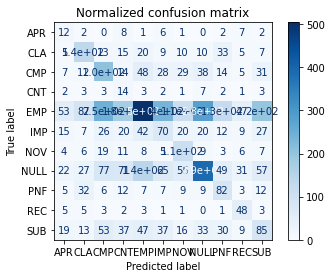

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_LOGISTIC.xlsx")

MULTINOMIAL

In [0]:
# import sklearn.metrics as metrics
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [0]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# np.set_printoptions(precision=3)

# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues)
#     disp.ax_.set_title(title)

# plt.show()

In [0]:
# import pandas as pd
# index=y_test.keys()
# x=[]
# y=[]
# z=[]
# for i in index:
#   x.append(new_corpus[i])
#   y.append(new_label[i])
#   z.append(y_pred[i-index[0]])

# df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
# df.to_excel("TFIDF_NB.xlsx")

RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       1.00      0.02      0.05        41
         CLA       0.65      0.35      0.45       264
         CMP       0.56      0.11      0.19       430
         CNT       0.33      0.02      0.05        41
         EMP       0.45      0.94      0.61      2074
         IMP       0.25      0.00      0.01       268
         NOV       0.83      0.05      0.10       188
        NULL       0.48      0.17      0.25       987
         PNF       0.38      0.03      0.05       184
         REC       0.60      0.17      0.26        72
         SUB       0.67      0.01      0.01       379

    accuracy                           0.46      4928
   macro avg       0.57      0.17      0.18      4928
weighted avg       0.50      0.46      0.36      4928

Accuracy: 0.46387987012987014


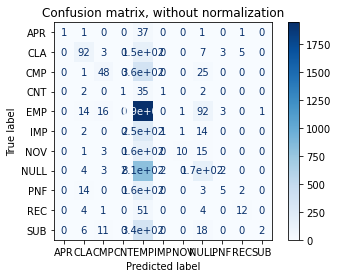

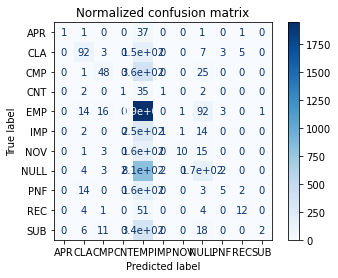

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_RANDOMFOR.xlsx")

SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.10      0.02      0.04        41
         CLA       0.42      0.53      0.47       264
         CMP       0.31      0.49      0.38       430
         CNT       0.21      0.07      0.11        41
         EMP       0.59      0.43      0.49      2074
         IMP       0.25      0.19      0.21       268
         NOV       0.51      0.46      0.48       188
        NULL       0.41      0.53      0.47       987
         PNF       0.30      0.30      0.30       184
         REC       0.53      0.51      0.52        72
         SUB       0.22      0.28      0.25       379

    accuracy                           0.43      4928
   macro avg       0.35      0.35      0.34      4928
weighted avg       0.45      0.43      0.43      4928

Accuracy: 0.4265422077922078


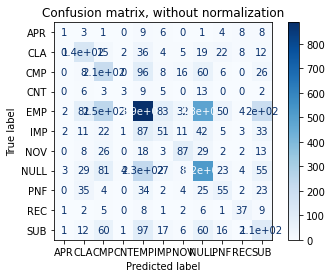

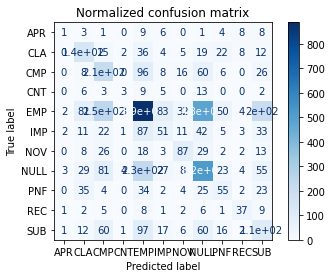

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_SVM.xlsx")

SGD

In [0]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.07      0.34      0.11        41
         CLA       0.36      0.58      0.44       264
         CMP       0.30      0.47      0.36       430
         CNT       0.05      0.22      0.09        41
         EMP       0.57      0.39      0.47      2074
         IMP       0.19      0.17      0.18       268
         NOV       0.31      0.57      0.40       188
        NULL       0.50      0.31      0.38       987
         PNF       0.23      0.45      0.30       184
         REC       0.34      0.62      0.44        72
         SUB       0.14      0.12      0.13       379

    accuracy                           0.37      4928
   macro avg       0.28      0.39      0.30      4928
weighted avg       0.43      0.37      0.38      4928

Accuracy: 0.3705357142857143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


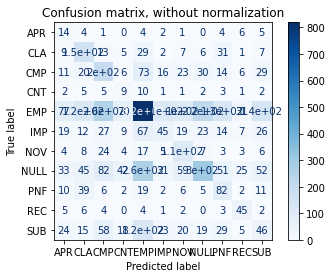

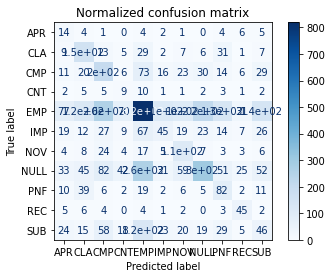

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_SGD.xlsx")

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.08      0.07      0.08        41
         CLA       0.26      0.28      0.27       264
         CMP       0.20      0.18      0.19       430
         CNT       0.04      0.07      0.05        41
         EMP       0.45      0.41      0.43      2074
         IMP       0.07      0.07      0.07       268
         NOV       0.13      0.14      0.13       188
        NULL       0.28      0.31      0.29       987
         PNF       0.11      0.14      0.12       184
         REC       0.14      0.17      0.15        72
         SUB       0.07      0.07      0.07       379

    accuracy                           0.29      4928
   macro avg       0.17      0.17      0.17      4928
weighted avg       0.30      0.29      0.29      4928

Accuracy: 0.28794642857142855


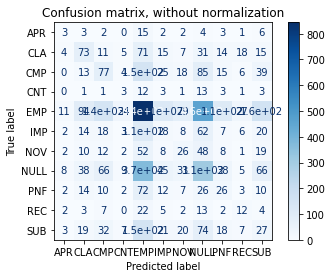

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_DECISION_TREE.xlsx")

In [0]:
y_test=y_test.reset_index()['tag'].tolist()
print(y_test)

AttributeError: ignored

In [0]:

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

TypeError: ignored

In [0]:
y_test=y_test.reset_index()['tag'].tolist()

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

------------------------------FOR KFOLD---------------------------------

LOGISTIC

In [0]:
y_test=y_test.reset_index()['tag'].tolist()

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.3987798929587517
recall score tfidf 0.3987798929587517
precison score tfidf 0.3987798929587517
accuracy score tfidf 0.3987798929587517
Logistic regression
f1 score tfidf 0.3987798929587517
recall score tfidf 0.3987798929587517
precison score tfidf 0.3987798929587517
accuracy score tfidf 0.3987798929587517


RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.39650448187032566
recall score tfidf 0.3965044818703257
precison score tfidf 0.3965044818703257
accuracy score tfidf 0.3965044818703257


SVM

In [0]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

KeyboardInterrupt: ignored

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
clf = DecisionTreeClassifier()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.27335477206885145
recall score tfidf 0.27335477206885145
precison score tfidf 0.27335477206885145
accuracy score tfidf 0.27335477206885145
